# CPSC-5616EL: Logistic Regression

# California Housing dataset (regression)

The California Housing dataset is a regression dataset, not a classification dataset. However, for the sake of visualization, we can convert it into a binary classification problem **Let's say we want to classify if a house is above or below the median house value.**.

Here we use the "**Median Income**" feature to predict if the house value is above or below the median. The sigmoid curve of the logistic regression model is plotted in red, with training data in blue and test data in green.

Here's how we can plot a logistic regression on the California Housing dataset.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23       1  
1    -122.22       1  
2    -122.24       1  
3    -122.25       1  
4    -122.25       1  


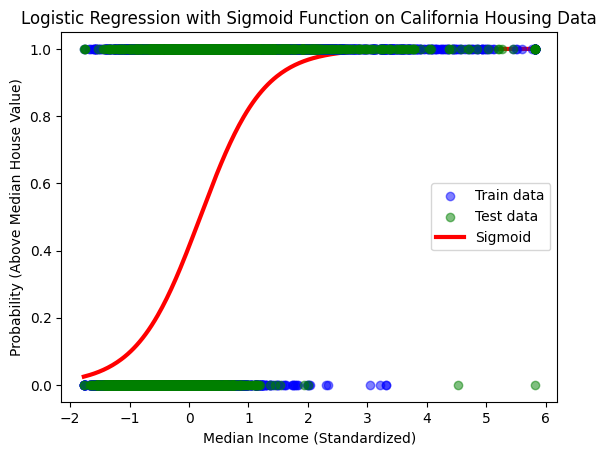

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2482
           1       0.76      0.62      0.69      1646

    accuracy                           0.77      4128
   macro avg       0.77      0.75      0.75      4128
weighted avg       0.77      0.77      0.77      4128



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the California Housing dataset
data = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# "Median Income" feature to predict if the house value is above or below the median
df['target'] = (data.target > np.mean(data.target)).astype(int)  # Convert to binary classification

print(df.head())
# For simplicity, let's use only the 'MedInc' (median income) feature
X = df[['MedInc']].values #
y = df['target'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

# Standardize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit logistic regression
log_clf = LogisticRegression().fit(X_train, y_train)

# Predict on test data
y_pred = log_clf.predict(X_test)

# For plotting the sigmoid function
x_test_range = np.linspace(X_train.min(), X_train.max(), 300)
def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(x_test_range * log_clf.coef_ + log_clf.intercept_).ravel()

# Plotting
plt.scatter(X_train, y_train, color='blue', zorder=20, alpha=0.5, label="Train data")
plt.scatter(X_test, y_test, color='green', zorder=20, alpha=0.5, label="Test data")
plt.plot(x_test_range, loss, color='red', linewidth=3, label="Sigmoid")
plt.xlabel("Median Income (Standardized)")
plt.ylabel("Probability (Above Median House Value)")
plt.title("Logistic Regression with Sigmoid Function on California Housing Data")
plt.legend()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


# Forest CoverType (multiclass) dataset (large)
**Can you apply logistic regression to the Forest CoverType (multiclass) dataset?**

Yes, but there are a few considerations to keep in mind:

1. Multiclass Classification: The Forest CoverType dataset is a multiclass classification problem, not a binary classification. There are 7 different cover types. Logistic regression is inherently binary, but there are strategies like **"one-vs-all" (OvA) or "one-vs-one" (OvO)** that can be employed for multiclass problems. **Fortunately, scikit-learn's LogisticRegression automatically handles multiclass classification**.

2. High Dimensionality: The dataset has 54 features, which means that the data is quite high-dimensional. Ensure you have enough data samples for each class to train the model effectively.

3. Data Size: The original Forest CoverType dataset is relatively large, containing over half a million samples. Logistic regression on such a dataset might take time, especially if you're not using a solver optimized for large datasets.

In below code is a basic example of how you can apply logistic regression to the Forest CoverType dataset using scikit-learn. We use a very small percentage (1%) of the original dataset (for demo), then further split that into training and testing sets. Working with a subset is faster and can help you quickly iterate and prototype, but remember, the performance on a subset might not be fully representative of the performance on the full dataset.

There's much room for optimization, like feature engineering, hyperparameter tuning, or using more complex models. The 'sag' solver (Stochastic Average Gradient descent) is chosen here because it's appropriate for multiclass classification and is faster for large datasets.

In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the dataset
data = fetch_covtype()

X = data.data
y = data.target

# Sample a subset of the data (e.g., 1%)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.01, random_state=18)

print("Sample size:", len(X_sample))
# Split the sampled data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=0)

# Standardize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression (using 'sag' solver for multiclass problem) - Stochastic Average Gradient descent
#log_clf = LogisticRegression(solver='sag', max_iter=1000, multi_class='auto').fit(X_train, y_train)
log_clf = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto').fit(X_train, y_train)

# Predict and evaluate
y_pred = log_clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


Sample size: 5810
              precision    recall  f1-score   support

           1       0.70      0.69      0.69       421
           2       0.73      0.80      0.77       563
           3       0.70      0.67      0.68        79
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        14
           6       0.43      0.16      0.24        37
           7       0.67      0.44      0.53        45

    accuracy                           0.71      1162
   macro avg       0.46      0.40      0.42      1162
weighted avg       0.69      0.71      0.70      1162



# Note:

The multi_class parameter is set to **'auto'**. This means that the strategy chosen will be based on the type of the data. According to scikit-learn documentation:

- 'ovr' means a binary problem is fit for each label (i.e., "one-vs-all" or OvA).
- 'multinomial' is the direct multinomial loss fit (this requires a solver that supports multinomial loss, such as 'lbfgs', 'sag', 'saga', or 'newton-cg').
- 'auto' will choose 'ovr' if the data is binary or if the solver='liblinear', and otherwise it will choose 'multinomial'.

In the code above we use the solver 'sag' (which supports multinomial loss) and the Forest CoverType dataset is a multiclass dataset, the 'auto' setting will opt for the **'multinomial'** strategy. Therefore, the code is using a multinomial logistic regression. The multinomial approach directly models the probabilities of the different classes.

# TODO:

1. 5%, 10%, 20% sample sizes
2. different solver e.g. 'liblinear' or non (default)